In [101]:
!pip install mecab-python3
#辞書インストール
!pip install unidic
!python -m unidic download

download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:18<00:00, 28.3MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.10/dist-packages/unidic/dicdir


In [104]:
#MeCabをインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8
!pip install unidic-lite

#これだとEOSがかかれる
!mecab -o ./neko.txt.mecab ./neko.txt


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [103]:
#これだとEOSの表示がない
import MeCab

mecab = MeCab.Tagger()  # オプションなしでデフォルトの解析器を使う
target = "neko.txt"
neko = "neko.txt.mecab"

with open(target, "r", encoding='utf-8') as f, open(neko, "w", encoding='utf-8') as out_f:
    text = f.read()
    parsed_text = mecab.parse(text)  # MeCabの解析結果を取得
    out_f.write(parsed_text)  # 出力結果を保存



In [105]:
file_path = '/content/neko.txt.mecab'

with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        if line == 'EOS\n':  # EOSが出たら終了
            break
        print(line.strip())  # 行末の改行を削除して表示

一	名詞,数,*,*,*,*,一,イチ,イチ


In [106]:
#30
def read_neko(file_path):
  sentences=[]
  sentence=[]
  with open(file_path,"r",encoding='utf-8') as f:
    for line in f:
      if line !="EOS\n":
        part = line.split("\t")
        surface=part[0]
        part_ = part[1].split(",")
        sent ={"surface":surface,"base":part_[6],"pos":part_[0],"pos1":part_[1]}
        sentence.append(sent)
      else:
        if sentence:
          sentences.append(sentence)
          sentence=[]
  return sentences

neko ="neko.txt.mecab"
sentences=read_neko(neko)

for morph in sentences[10]:
  print(morph)


{'surface': '掌', 'base': '掌', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'}
{'surface': '上', 'base': '上', 'pos': '名詞', 'pos1': '非自立'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '少し', 'base': '少し', 'pos': '副詞', 'pos1': '助詞類接続'}
{'surface': '落ちつい', 'base': '落ちつく', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'て', 'base': 'て', 'pos': '助詞', 'pos1': '接続助詞'}
{'surface': '書生', 'base': '書生', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'}
{'surface': '顔', 'base': '顔', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'を', 'base': 'を', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '見', 'base': '見る', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'の', 'base': 'の', 'pos': '名詞', 'pos1': '非自立'}
{'surface': 'が', 'base': 'が', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'いわゆる', 'base': 'いわゆる', 'pos': '連体詞', 'pos1': '*'}
{'surface': '人間', 'base': '人間', 'pos': '名詞', 'pos1': '一般'}


In [107]:
#31
verb=[]
for sentence in sentences:
  for sent in sentence:
    if sent["pos"]=="動詞":
      verb.append(sent["surface"])

print(verb)

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'のみ', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', '分ら', 'なる', '減る', '降っ', '来る', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', '逢っ', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', '出来', '見', '這い', '上っ', '投げ出さ', 'れ', '投げ出さ', 'れ', '這い', '上り', '這い', '上っ', '投げ出さ', 'れ', '繰り返し', 'し', 'いる', '云う', 'なっ', 'し', 'やっ', '下り', 'つまみ出さ', 'れよ

In [108]:
#32
basic=[]
for sentence in sentences:
  for sent in sentence:
    if sent["pos"]=="動詞":
      basic.append(sent["base"])

print(basic)

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'のむ', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る', '始める', 'する', '這う', '行く', '出る', '這入る', 'なる', '思う', '崩れる', 'もぐり込む', '破れる', 'いる', 'する', '知れる', '云う', '至る', 'する', 'なる', 'いる', '忍び込む', '分る', 'なる', '減る', '降る', '来る', '出来る', 'なる', 'あるく', '行く', '考える', '這入る', 'おる', '見る', 'する', '逢う', '見る', 'つかむ', '抛り出す', '思う', 'ねぶる', '任せる', 'いる', '出来る', '見る', '這う', '上る', '投げ出す', 'れる', '投げ出す', 'れる', '這う', '上る', '這う', '上る', '投げ出す', 'れる', '

In [109]:
#33
AtoB=[]
for sentence in sentences:
  for i in range(len(sentence)-2):
    if sentence[i]["pos"]=="名詞" and sentence[i+1]["surface"]=="の" and sentence[i+2]["pos"]=="名詞":
      AtoB.append(sentence[i]["surface"] + sentence[i+1]["surface"] + sentence[i+2]["surface"])

print(AtoB)

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '人の気', '彼の背中', 'こっちの便利', '自己の力量', '人間の不徳', '吾輩の家', '家の裏', '浩然の気', '小春の穏', '日の二', '茶の木の根', '西側の杉', '垣のそば', '他の庭', '純粋の黒', '彼の皮膚', '皮膚の上',

In [110]:
#34
connect=[]
for sentence in sentences:
  none=""
  i=0
  for sent in sentence:
    if sent["pos"]=="名詞":
      none += sent["surface"]
      i+=1
    else:
      if none :
        if i>=2:
          connect.append (none)
        i=0
        none=""
  if none and i>=2:
    connect.append(none)

print(connect)

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '平生吾輩', '馬鹿野郎', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな日', '二時頃', '昼飯後', '運動かたがた', '一本一本', '杉垣', '前後不覚', '庭内', '忍び入り', '黒猫', '柔毛', '出ずるよう', '猫中', '杉垣', '二三枚', 'ぐべき力', '険呑', '時吾輩', '言葉付', '誰だい', '乱暴猫', '同盟敬遠主義', '一体車屋', '大分強そう', 'おれなんざ', '茶畠', '箆棒め', 'あらら', 'その後吾輩', '車屋相当', '不徳事件', '日例', '茶畠', '何匹', '近付', '事彼', '手柄話', '欠所', '三

In [111]:
#35
from collections import Counter

count=Counter()
word=[]
for sentence in sentences:
  for sent in sentence:
    if sent["pos"] != "記号":
      count[sent["base"]] += 1

sort_word =count.most_common()

for word,count in sort_word:
  if count>=2:
    print(word,":",count)

ストリーミング出力は最後の 5000 行に切り捨てられました。
天井 : 11
独逸 : 11
かの : 11
構える : 11
猿 : 11
中学 : 11
年生 : 11
手拭 : 11
故に : 11
張 : 11
敷く : 11
流れる : 11
窮屈 : 11
勧める : 11
用事 : 11
意志 : 11
一大 : 11
手際 : 11
盗難 : 11
汗 : 11
引っ張る : 11
運命 : 11
インスピレーション : 11
魚 : 11
精神 : 11
退校 : 11
捕える : 10
煮る : 10
肝心 : 10
減る : 10
竹垣 : 10
遍 : 10
宿 : 10
帯びる : 10
あらわす : 10
つらい : 10
鳴らす : 10
別 : 10
床 : 10
鑑定 : 10
感ずる : 10
たまらない : 10
辛 : 10
ひそか : 10
怒鳴る : 10
何しろ : 10
食える : 10
肝 : 10
謹聴 : 10
泥 : 10
揚げる : 10
好く : 10
卒業 : 10
自 : 10
明瞭 : 10
裡 : 10
久し振り : 10
端書 : 10
からだ : 10
存 : 10
いわんや : 10
握る : 10
べ : 10
前歯 : 10
挟む : 10
御存じ : 10
傾向 : 10
見物 : 10
汁 : 10
ちゃあ : 10
上野 : 10
攻撃 : 10
頭脳 : 10
二絃琴 : 10
あげる : 10
動かす : 10
申し合せる : 10
堅い : 10
三毛 : 10
互に : 10
洩らす : 10
三角 : 10
いずれ : 10
天璋院 : 10
空気 : 10
転がる : 10
辟易 : 10
巻煙草 : 10
並ぶ : 10
名刺 : 10
気色 : 10
都合 : 10
罹る : 10
春風 : 10
船頭 : 10
使 : 10
被 : 10
候う : 10
兼 : 10
余計 : 10
鉢 : 10
だの : 10
あいつ : 10
詩人 : 10
禅 : 10
踏む : 10
鐘 : 10
それだけ : 10
橋 : 10
幸い : 10
敲く : 10
取り : 10
義理 : 10
いと : 10
依頼 : 10
折々 : 10
崎 : 10
頓 : 10
た

In [112]:
!pip install japanize-matplotlib

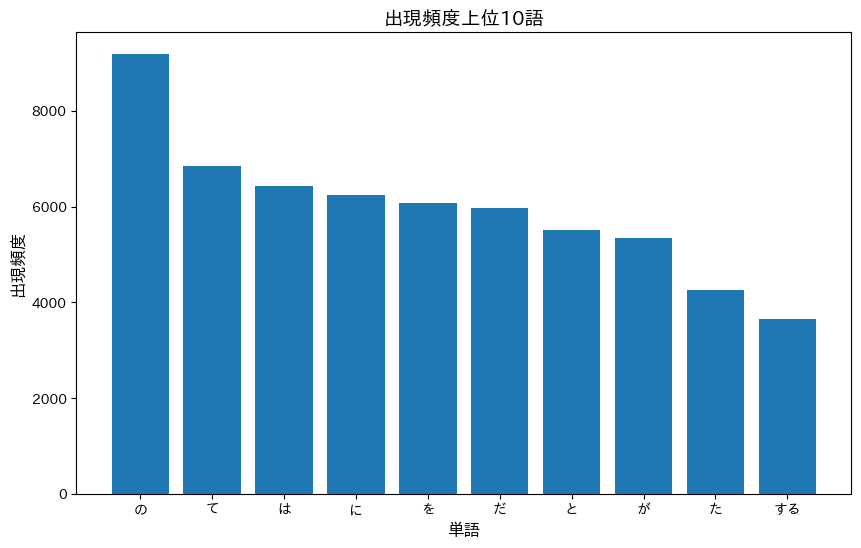

In [114]:
#36
import japanize_matplotlib
from collections import Counter
import matplotlib.pyplot as plt


count=Counter()
word=[]
for sentence in sentences:
  for sent in sentence:
    if sent["pos"] != "記号":
      count[sent["base"]] += 1

sort_word_ten =count.most_common(10)
key=[]
values=[]
for word,count in sort_word_ten:
  key.append(word)
  values.append(count)

# 棒グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(key, values)
plt.xlabel('単語', fontsize=12)
plt.ylabel('出現頻度', fontsize=12)
plt.title('出現頻度上位10語', fontsize=14)

plt.show()

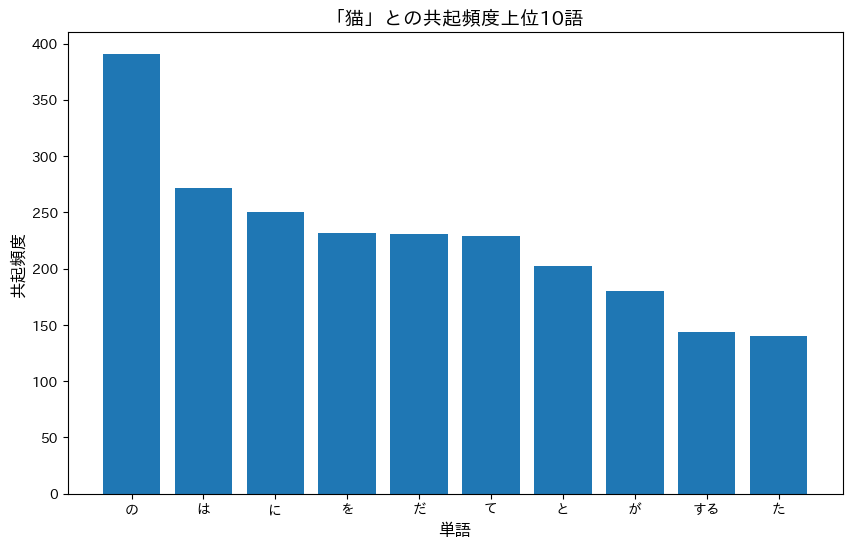

In [115]:
#37
import japanize_matplotlib
from collections import Counter
import matplotlib.pyplot as plt

cat_count=Counter()
cat_word=[]
for sentence in sentences:
  cat=0
  for sent in sentence:
    if sent["surface"] == "猫":
      cat = 1
  if cat!=0:
    for sent in sentence:
      if sent["pos"]!="記号" and sent["surface"]!="猫":
        cat_count[sent["base"]] +=1


sort_cat_ten =cat_count.most_common(10)
key=[]
values=[]
for word,count in sort_cat_ten:
  key.append(word)
  values.append(count)

# 棒グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(key, values)
plt.xlabel('単語', fontsize=12)
plt.ylabel('共起頻度', fontsize=12)
plt.title('「猫」との共起頻度上位10語', fontsize=14)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

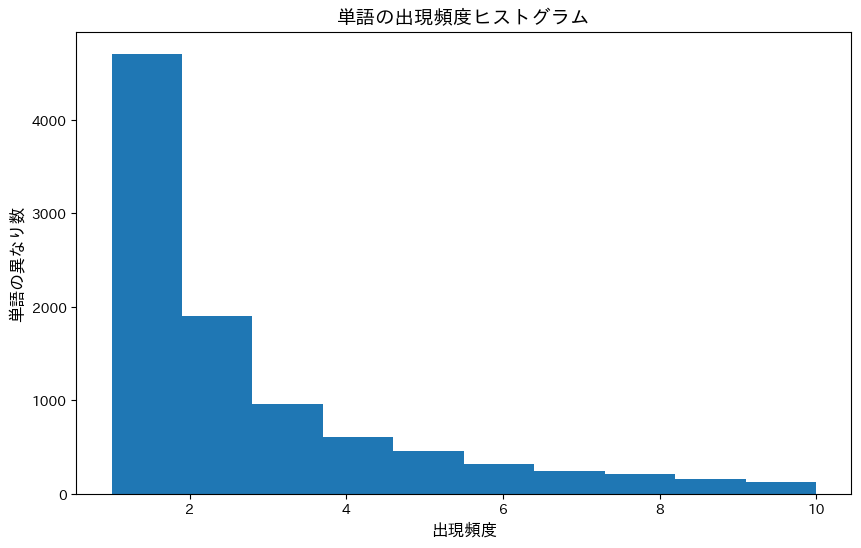

In [116]:
#38
from collections import Counter

count=Counter()
word=[]
for sentence in sentences:
  for sent in sentence:
    if sent["pos"] != "記号":
      count[sent["base"]] += 1

value=count.values()

plt.figure(figsize=(10, 6))
plt.hist(value, bins = 10,range=(1,10))
plt.xlabel("出現頻度", fontsize=12)
plt.ylabel("単語の異なり数", fontsize=12)
plt.title('単語の出現頻度ヒストグラム', fontsize=14)
plt.show

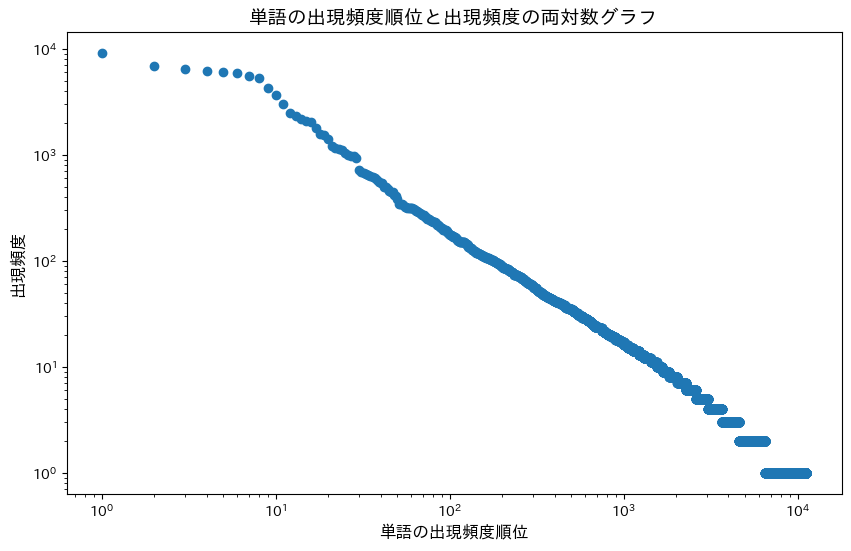

In [117]:
#39
import japanize_matplotlib
from collections import Counter
import matplotlib.pyplot as plt


count=Counter()
word=[]
for sentence in sentences:
  for sent in sentence:
    if sent["pos"] != "記号":
      count[sent["base"]] += 1

sort_word =count.most_common()

rank=range(1,len(sort_word)+1)
frequency=[]
for word,count in sort_word:
  frequency.append(count)

# 棒グラフを描画
plt.figure(figsize=(10, 6))
plt.scatter(rank, frequency)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('単語の出現頻度順位', fontsize=12)
plt.ylabel('出現頻度', fontsize=12)
plt.title('単語の出現頻度順位と出現頻度の両対数グラフ', fontsize=14)

plt.show()